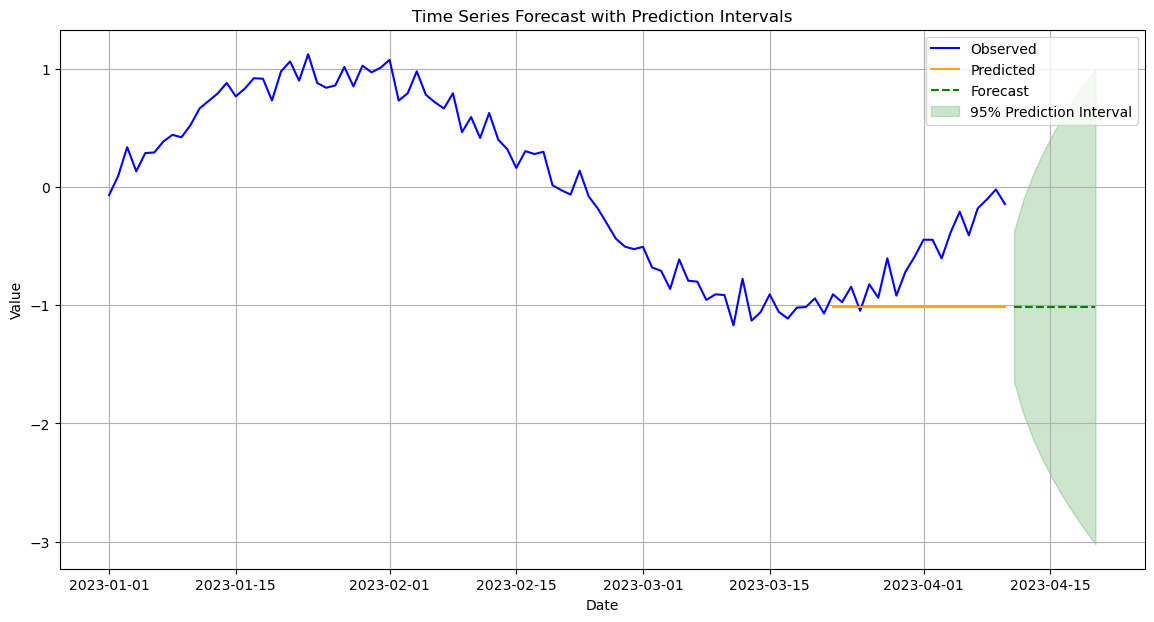

In [1]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Example time series data (replace with your actual dataset)
# This example assumes daily data with a single feature for simplicity
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
data = pd.DataFrame({
    'date': dates,
    'value': np.sin(np.linspace(0, 3.14*2, 100)) + np.random.normal(0, 0.1, 100)
})
data['day_of_year'] = data['date'].dt.dayofyear  # Example feature

# Split the data into training and validation sets
X = data[['day_of_year']]
y = data['value']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a CatBoost model
model = CatBoostRegressor(iterations=100, depth=3, learning_rate=0.1, loss_function='RMSE', verbose=False)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_valid)

# Calculate residuals
residuals = y_valid - y_pred

# Calculate the standard deviation of the residuals
sigma = np.std(residuals, ddof=1)

# Forecasting future values
forecast_horizon = 10  # Example forecast horizon of 10 days
future_dates = pd.date_range(start=dates.max() + pd.Timedelta(days=1), periods=forecast_horizon, freq='D')
future_X = pd.DataFrame({
    'day_of_year': future_dates.dayofyear
})

# Make future predictions
future_forecasts = model.predict(future_X)

# Calculate prediction intervals
z_alpha = 1.96  # 95% confidence interval
se_h = sigma * np.sqrt(np.arange(1, forecast_horizon + 1))  # Standard error increases with the forecast horizon
upper_bounds = future_forecasts + z_alpha * se_h
lower_bounds = future_forecasts - z_alpha * se_h

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['date'], data['value'], label='Observed', color='blue')
plt.plot(dates[-len(y_valid):], y_pred, label='Predicted', color='orange')
plt.plot(future_dates, future_forecasts, label='Forecast', color='green', linestyle='--')
plt.fill_between(future_dates, lower_bounds, upper_bounds, color='green', alpha=0.2, label='95% Prediction Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecast with Prediction Intervals')
plt.legend()
plt.grid(True)
plt.show()